<h1>Homework 2: The best books of all time</H1>

Domenico Mangieri 1883920

---

<H2>Libraries</H2>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import json
import calendar

import functions

%matplotlib inline
import matplotlib.pyplot as plt

<H2>Data management</H2>


Before starting to analize the dataset throught all the excercises, it's useful to save our dataset in a local file to work with it. For lighter_books.json we have to chunk it, clean it from the useless feature(feature that we're not going to need for the analysis) and then put it in a new variabile called df.

In [2]:
authors_json = pd.read_json('lighter_authors.json', lines=True)
authors_json = authors_json.drop(['image_url', 'about'], axis = 1)
authors_json

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,179
...,...,...,...,...,...,...,...,...,...,...
351762,19,4.26,3,"[79663810, 56338563, 65881656]","[53075671, 35051340, 42264980]",3,16777034,Lyon Gamer,male,0
351763,11,3.36,2,[42091916],[22604300],1,16777055,Brian Hatch,male,0
351764,23,3.78,5,"[61906297, 61366902, 45107362]","[40246014, 39710679, 25363358]",3,16777067,Nicholas Baer,male,1
351765,0,0.00,0,[50301486],[29919838],1,16777091,James Ketron Ross,male,0


In [3]:
with pd.read_json('lighter_books.json', lines=True, chunksize=10000) as reader:
    l = []
    for chunk in reader:
        df = chunk.drop(['id', 'authors', 'work_id', 'isbn', 'isbn13', 'asin', 'edition_information', 'image_url', 'publisher', 'shelves', 'description'], axis=1)
        df.num_pages = pd.to_numeric(df.num_pages, errors='coerce')
        l.append(df)
    df = pd.concat(l)
df

,title,author_name,author_id,language,average_rating,rating_dist,ratings_count,text_reviews_count,publication_date,original_publication_date,format,num_pages,series_id,series_name,series_position
0,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,1077326,eng,4.50,5:1674064|4:664833|3:231195|2:41699|1:16215|to...,2628006,44716,2004-09,2003-06-21,Paperback,870.0,45175,Harry Potter,5
1,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,1077326,eng,4.48,5:4801606|4:1681521|3:623286|2:145898|1:125040...,7377351,116930,2003-11-01,1997-06-26,Hardcover,309.0,45175,Harry Potter,1
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,1077326,eng,4.43,5:1690166|4:781011|3:313727|2:54687|1:15453|to...,2855044,55286,2003-11-01,1998-07-02,Hardcover,352.0,45175,Harry Potter,2
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,1077326,eng,4.57,5:1994597|4:696545|3:212678|2:28915|1:13959|to...,2946694,58023,2004-05-01,1999-07-08,Mass Market Paperback,435.0,45175,Harry Potter,3
4,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling,1077326,eng,4.56,5:1808039|4:663849|3:193604|2:27759|1:12425|to...,2705676,48637,2002-09-28,2000-07-08,Paperback,734.0,45175,Harry Potter,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027426,Julie eller Den nya Héloïse BOK I,Jean-Jacques Rousseau,7994,swe,3.08,5:7|4:11|3:16|2:13|1:4|total:51,51,0,1999,1761,Hardcover,597.0,,,
7027427,A Frozen Heart,Walt Disney Company,3510823,eng,3.85,5:556|4:518|3:443|2:128|1:38|total:1683,1683,299,2015-08-25,2015-10-13,Kindle Edition,304.0,,,
7027428,O Segredo Da Serpente,Stephen Cole,5614141,por,3.66,5:236|4:346|3:269|2:102|1:33|total:986,986,99,2011,2006-02-06,Paperback,320.0,61676,Thieves Like Us,1
7027429,Lives of Mahomet and his successors,Washington Irving,28525,,3.78,5:5|4:8|3:2|2:2|1:1|total:18,18,1,,,,NaN,,,


<H1>[RQ1] Exploratory Data Analysis (EDA) - Before working on your research questions, you should provide meaningful statistical summaries through visualizations and tabular tools to understand your data.</H1>

First of all we need to see wich type of values we'll find in both books and authors dataset. Then we analize the dataset in order to find null or empty values. As we can see there are Null values only in the num_pages feature because it's the only feature were we worked in order to convert values type. All the other feature could have empty or wrong values.

In [146]:
print(df.dtypes)
print()
print(authors_json.dtypes)

title                         object
author_name                   object
author_id                      int64
language                      object
average_rating               float64
rating_dist                   object
ratings_count                  int64
text_reviews_count             int64
publication_date              object
original_publication_date     object
format                        object
num_pages                    float64
series_id                     object
series_name                   object
series_position               object
dtype: object

ratings_count           int64
average_rating        float64
text_reviews_count      int64
work_ids               object
book_ids               object
works_count             int64
id                      int64
name                   object
gender                 object
fans_count              int64
dtype: object


In [145]:
df.isnull().sum()

title                              0
author_name                        0
author_id                          0
language                           0
average_rating                     0
rating_dist                        0
ratings_count                      0
text_reviews_count                 0
publication_date                   0
original_publication_date          0
format                             0
num_pages                    3071835
series_id                          0
series_name                        0
series_position                    0
dtype: int64

<H1>[RQ2] Let’s finally dig into this vast dataset, retrieving some vital information:</H1>

<H2>Plot the number of books for each author in descending order.</H2>

To answer at this question we just need to sort authors database by works_count and then print the authors name and the books number. Only the first 100 authors name were print beacuse of the large authors number

In [148]:
ndf = authors_json.sort_values(by='works_count', ascending=False)
authors_name = np.array(ndf['name'])
n_book = np.array(ndf['works_count'])
for i in range (0, len(authors_name)):
    print(i, ": ", authors_name[i], "wrote", n_book[i], "books")
    if i > 100:
        break

0 :  NOT A BOOK wrote 1775176 books
1 :  Jesse Russell wrote 186086 books
2 :  Ronald Cohn wrote 186047 books
3 :  Anonymous wrote 182675 books
4 :  Unknown wrote 163434 books
5 :  Source Wikipedia wrote 120379 books
6 :  Various wrote 79378 books
7 :  Philip M. Parker wrote 27480 books
8 :  U.S. Congress wrote 25835 books
9 :  Books LLC wrote 24975 books
10 :  Livres Groupe wrote 23896 books
11 :  Walt Disney Company wrote 19702 books
12 :  National Aeronautics and Space Administration wrote 18643 books
13 :  Source Wikia wrote 17483 books
14 :  U.S. House of Representatives wrote 13387 books
15 :  Fuente Wikipedia wrote 9320 books
16 :  William Shakespeare wrote 9083 books
17 :  Organisation for Economic Co-operation and Development wrote 7061 books
18 :  Arthur Conan Doyle wrote 6905 books
19 :  McGraw-Hill Education wrote 6795 books
20 :  National Research Council wrote 6285 books
21 :  U.S. Department of the Army wrote 6255 books
22 :  Charles Dickens wrote 6183 books
23 :  Hal Le

<H2>Which book has the highest number of reviews?</H2>

We need to sort books database by text_reviews_count and then print the authors name and the text reviews count

In [8]:
df_trc = df.sort_values(by='text_reviews_count', ascending=False)
print(df_trc.iloc[0].title + ' has ' + str(df_trc.iloc[0].text_reviews_count) + ' reviews')

The Hunger Games (Hunger Games, #1) has 174524 reviews


<H2>Which are the top ten and ten worst books concerning the average score?</H2>

For this question I sorted the books dataset by average rating and then extract the first and last 10 books by rating

In [20]:
df_ar = df.sort_values(by='average_rating', ascending=False)
top_10 = df_ar.head(10)
worst_10 = df_ar.tail(10)
print("The ten books with the highest average score:")
for i in range(0, 10):
    print(str(i+1) + ': \'' + top_10.title.iloc[i] + '\' with \'' + str(top_10.average_rating.iloc[i]) + '\' average rating')
print()
print("The ten books with the lowest average score:")
for i in range(0, 10):
    print(str(i+1) + ': \'' + worst_10.title.iloc[i] + '\' with \'' + str(worst_10.average_rating.iloc[i]) + '\' average rating')

The ten books with the highest average score:
1: 'အိပ်မက်နှင်းမြူ' with '5.0' average rating
2: 'Danger Rode Drag' with '5.0' average rating
3: 'Superman Returns Deluxe Photo Book' with '5.0' average rating
4: 'Very Dirty Stories #40' with '5.0' average rating
5: 'One Year Book of Quiet Times with God' with '5.0' average rating
6: 'Very Dirty Stories #4' with '5.0' average rating
7: 'Very Dirty Stories #47' with '5.0' average rating
8: 'When I Am Older, I Will Pray More: Prayers in the Senior Years' with '5.0' average rating
9: 'The Trouble with Jake' with '5.0' average rating
10: 'Very Dirty Stories #45' with '5.0' average rating

The ten books with the lowest average score:
1: 'Postsocialist Cinema in Post-Mao China: The Cultural Revolution After the Cultural Revolution' with '0.0' average rating
2: 'Postsocialist Cinema in Post-Mao China: The Cultural Revolution After the Cultural Revolution' with '0.0' average rating
3: 'Fleetwood: The Stain of Birth' with '0.0' average rating
4: '

<H2>Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.</H2>

In order to answer at this question I grouped the book dataset by language and create a dictionary with every language as key. Then I count how many books were in the dataset for each language and added it in another dictionary. Then we used a pie chart to represent the most representative language in the dataset. But how we can see most of the books don't have a language so we removed all the 'others' group to have a better view of the distribution

In [89]:
d_l = dict(df.groupby('language', sort=True)['language'].count())
d_res = {'others':d_l.pop('')}
for keys in d_l: 
    if (d_l[keys] < 20000):
        pv = d_res['others'] 
        d['others'] = pv + d_l[keys]
    else:
        d_res[keys] = d_l[keys]

([<matplotlib.patches.Wedge at 0x131b4dd24d0>,
 [Text(-0.47152485177187187, 0.993813017705803, 'others'),
  Text(-0.6753854336571814, -0.8682479576732106, 'ara'),
  Text(-0.6254696786059937, -0.9048688751109274, 'en-GB'),
  Text(-0.5584675294825442, -0.9476887772437024, 'en-US'),
  Text(0.1576570245051045, -1.088643312855132, 'eng'),
  Text(0.8166259881306089, -0.7369681102393147, 'fre'),
  Text(0.9020603451082722, -0.629513410328283, 'ger'),
  Text(0.9504246102946078, -0.5537987541935637, 'ind'),
  Text(0.9873747631944171, -0.48486191540145634, 'ita'),
  Text(1.0218489242150524, -0.4072158838755438, 'jpn'),
  Text(1.0404777163667842, -0.3569399413685189, 'nl'),
  Text(1.0547214735719856, -0.3123501451674699, 'pol'),
  Text(1.06819939644189, -0.2625834142537983, 'por'),
  Text(1.0799983193078886, -0.2088148229703442, 'rus'),
  Text(1.093207635058842, -0.12205354009226338, 'spa'),
  Text(1.099206707506201, -0.04176857878090663, 'swe'),
  Text(1.0998885105329335, -0.01566091943805513, 't

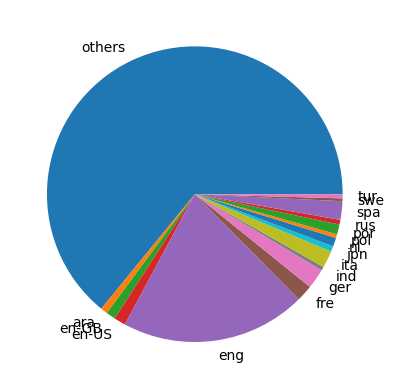

In [90]:
plt.pie(list(d_res.values()), labels = list(d_res.keys()))

([<matplotlib.patches.Wedge at 0x1c642160910>,
 [Text(1.0976079452744376, 0.07250378245600288, 'ara'),
  Text(1.0728211972023927, 0.24301168456110359, 'en-GB'),
  Text(1.0025201158975734, 0.4527178119101522, 'en-US'),
  Text(-0.7395787615535101, 0.8142623996347715, 'eng'),
  Text(-0.5024104411611796, -0.9785620821451386, 'fre'),
  Text(-0.1387292322038917, -1.0912168437721803, 'ger'),
  Text(0.11104985296505597, -1.094380157969085, 'ind'),
  Text(0.3242725110596394, -1.0511171859365045, 'ita'),
  Text(0.5412440900305893, -0.957629800605098, 'jpn'),
  Text(0.6658994020381337, -0.8755443942857816, 'nl'),
  Text(0.7647773882986479, -0.7906424895912813, 'pol'),
  Text(0.8612157057043985, -0.6843299702980099, 'por'),
  Text(0.9479579868942868, -0.5580104435253265, 'rus'),
  Text(1.0476593533811722, -0.3352758256614157, 'spa'),
  Text(1.093849265879643, -0.11616274589801184, 'swe'),
  Text(1.0991349637940626, -0.04361572383240657, 'tur')])

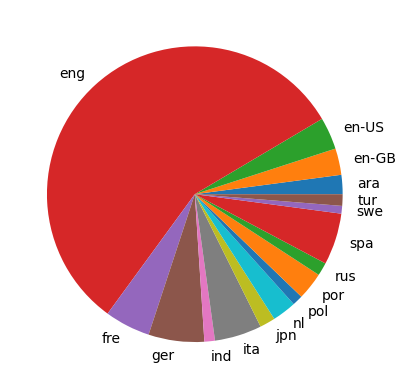

In [91]:
d_res.pop('others')
plt.pie(list(d_res.values()), labels = list(d_res.keys()))

<H2>How many books have more than 250 pages?</H2>

For this task the only attribute that we need is 'num_pages' from 'lighter_books.json'.
Some books in the dataset don't have a valid pages numbers' value so they'll not be considered in the analisys because we change the num_pages type in dataset putting all non integer values equal to Nan

In [91]:
n = len(df.query("num_pages > 250"))
print(str(n) + ' books have more than 250 pages')

1810335 books have more than 250 pages


<H2>Plot the distribution of the fans count for the 50 most prolific authors.</H2>

For this question I sorted the authors dataset by works_count and then extracting the first 50 with their fans number. Then we used a violin chart to represent the fans distribution

In [94]:
au_pa = authors_json.sort_values(by='works_count', ascending=False)
i = 0
d = {}
for row in au_pa.iterrows():
    if i == 50:
        break
    i = i + 1
    d[row[1].iloc[7]] = row[1].iloc[9]
print(d)

{'NOT A BOOK': 4504, 'Jesse Russell': 164, 'Ronald Cohn': 31, 'Anonymous': 2456, 'Unknown': 1067, 'Source Wikipedia': 143, 'Various': 898, 'Philip M. Parker': 10, 'U.S. Congress': 47, 'Books LLC': 158, 'Livres Groupe': 9, 'Walt Disney Company': 2119, 'National Aeronautics and Space Administration': 47, 'Source Wikia': 12, 'U.S. House of Representatives': 11, 'Fuente Wikipedia': 2, 'William Shakespeare': 36816, 'Organisation for Economic Co-operation and Development': 19, 'Arthur Conan Doyle': 19044, 'McGraw-Hill Education': 51, 'National Research Council': 27, 'U.S. Department of the Army': 68, 'Charles Dickens': 23779, 'Hal Leonard Corporation': 94, 'McDougal Littell': 20, 'Edgar Allan Poe': 20867, 'Charles River Editors': 113, 'Mark Twain': 15525, 'D.K. Publishing': 899, 'Institute of Electrical and Electronics Engineers': 6, 'Alexandre Dumas': 8884, 'Hephaestus Books': 120, 'Lonely Planet': 639, 'British War Office': 30, 'Enid Blyton': 4794, 'Anton Chekhov': 6965, 'Leo Tolstoy': 187

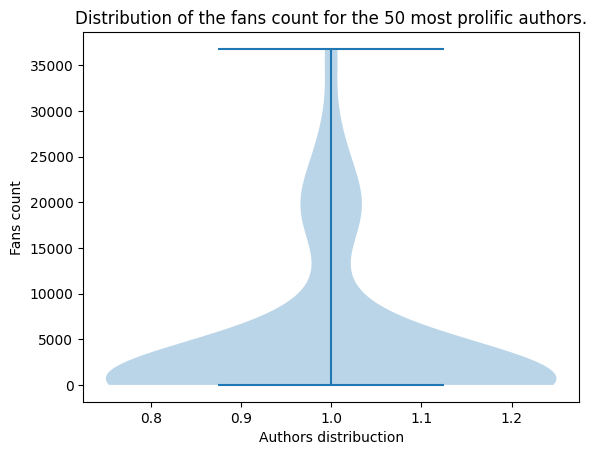

In [95]:
plt.violinplot(list(d.values()))
plt.xlabel('Authors distribuction')
plt.ylabel('Fans count')
plt.title('Distribution of the fans count for the 50 most prolific authors.')
plt.show()

<H1>[RQ3] Let’s have a historical look at the dataset!</H1>

<H2>Write a function that takes as input a year and returns as output the following information</H2>
<H3>The number of books published that year</H3>
<H3>The total number of pages written that year</H3>
<H3>The most prolific month of that year</H3>
<H3>The longest book written that year</H3>

To answer this question I analize books dataset to find each book with a valid date(or just a valid year) and then took the information nedeed.
To find the most prolifiv month I used a regex to match all the publication date with 4 digit and then a dash with 2 more digit(wich could repeat).
Then the most prolific month was detect with a groupby and a size methods 

In [97]:
def book_analysis_by_years(year, df):
    df_aux = df[df.publication_date.str.startswith(str(year))]
    df_npnn = df_aux[df_aux.num_pages.notna()]
    
    #number of books published in a given year
    nbp = len(df_npnn) 

    #pages written in a given year
    np = df_npnn.num_pages.astype(int).sum()

    #Longest book written in a given year
    nump = df_npnn.num_pages.astype(int).max()
    if len(df_npnn[df_npnn.num_pages == nump].title.values) > 0:
        nlb = df_npnn[df_npnn.num_pages == nump].title.values[0]
    else:
        nlb = None

    #most prolific month of that year
    df_npnn= df_npnn[df_npnn.publication_date.str.match(r'\d{0,4}(-\d{2}){1,2}')]
    df_npnn.publication_date = df_npnn.publication_date.str.split('-').str[1]
    nm = df_npnn.groupby(by='publication_date').size()
    m_nm = nm.max()
    mpm = ""
    for i in range (1, 13):
        if i-1 < len(nm):
            if nm.iloc[i-1] == m_nm:
                mpm = calendar.month_name[i]
                break
            

    #print('In ' + str(year) + ' were published ' + str(nbp) + ' books')
    #print('In ' + str(year) + ' were written ' + str(np) + ' pages')
    #print('The most prolific month of that year was the ' + mpm + ' with ' + str(m_nm) + ' pages written')
    #print('The longest book written in ' + str(year) + ' is \"' + nlb + '\" with ' + str(nump) + ' pages')

    return([nbp, np, mpm, nlb])
    
book_analysis_by_years(2003, df)

[90999,
 25332025,
 'January',
 '21st Century Complete Guide To The National Security Agency (Nsa) With Information On Nsa Cryptology And History, Infosec Program, Computer Security Recommendation ... Initiative, World War Ii, Korean War']

<H2>Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row, Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.</H2>

To build our dataframe first of all we need to find the list of all years in the book dataset and then we can just call the book_analysis_by_years function and then append the result into a list wich will be converted in our new dataframe

In [98]:
df_npnn= df[df.publication_date.str.match(r'\d{0,4}')]
df_years = df_npnn.publication_date.str.split('-').str[0]
ys = set(df_years)
yl = [int(y) for y in ys if (y!= '' and int(y) < 2024 and int(y) > 0)]
yl.sort()

In [102]:
mydf = pd.DataFrame()
l = []
i = 0
for el in yl:
        if i == 100:
            break
        i += 1
        res = book_analysis_by_years(el, df)
        l.append(pd.DataFrame(res).T)
mydf = pd.concat(l)
mydf.rename(columns={0: "n_books", 1: "n_pages", 2: "most_prolific_month", 3: "longest_book_title"}, inplace=True)
print(mydf)

    n_books     n_pages most_prolific_month  \
0    918113  4542691699             January   
0   2884498  3183355564             January   
0        55       22908               April   
0        12       13612            February   
0         4        7957             January   
..      ...         ...                 ...   
0        12       12510             January   
0        11        2594             January   
0        20        3739             January   
0        37        9558             January   
0        66       24190               March   

                                   longest_book_title  
0                        Les grands mystères du passé  
0                               A Half Forgotten Song  
0                               Каменот од твојот ден  
0                                         Vara fatala  
0                                     Secrets to Keep  
..                                                ...  
0   Royal Genealogies; or, The Genealogical

<H2>Ask ChatGPT or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it.</H2>

Asking ChatGPT to implement the function I tried multiple times with diferent result but never it could work. In many implementation there are missng controls with empty list or values or index out of bounds. All of this erros should be the result of missing or incorrect values in the dataset.

In [101]:
from datetime import datetime

df_gpt = pd.DataFrame(df)

def process_year(year, df_gpt):
    # Convert publication_date to datetime
    df_gpt['publication_date'] = pd.to_datetime(df_gpt['publication_date'],errors='coerce')
    df_gpt = df_gpt[df_gpt.publication_date.notna()]
    
    # Filter data for the given year
    year_data = df_gpt[df_gpt['publication_date'].dt.year == year]
    
    # Number of books published that year
    num_books = len(year_data)
    
    # Total number of pages written that year
    total_pages = year_data['num_pages'].sum()
    
    # Extract month from publication_date
    year_data['month'] = year_data['publication_date'].dt.month
    
    # Find the most prolific month
    prolific_month = year_data['month'].value_counts().idxmax()
    
    # Find the longest book written that year
    longest_book = year_data.loc[year_data['num_pages'].idxmax(), 'title']
    
    return {
        'num_books': num_books,
        'total_pages': total_pages,
        'prolific_month': prolific_month,
        'longest_book': longest_book
    }

# Sample usage
year_info = process_year(2023, df_gpt)
print(year_info)

# Create a DataFrame with year as the primary key
years = range(df['publication_date'].dt.year.min(), df['publication_date'].dt.year.max() + 1)
result_data = [process_year(year, df) for year in years]

result_df = pd.DataFrame(result_data, index=years)
print(result_df)

ValueError: attempt to get argmax of an empty sequence

<H1>[RQ4] Quirks questions about consistency. In most cases, we will not have a consistent dataset, and the one we are dealing with is no exception. So, let's enhance our analysis.</H1>

<H2>You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?</H2>

To make sure there are no eponymous we just need to check if the length of the database is the same of the lenght when the database is grouped by authors name

In [121]:
authors_name = authors_json.groupby('name')
print(len(authors_name))
print(authors_json.size)
print(authors_name.size == authors_json.size)

351730
3517670
False


<H2>Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written</H2>

this function iterate through the dataframe selecting the names of all the books the author has written checking the ids. I didn't print the output beacuse of the large space nedeed.

In [149]:
def book_written_by_authors(author_ids):
    ad = dict.fromkeys(author_ids, [])
    for row in df.iterrows():
        if row[1].iloc[2] in author_ids:
            l  = ad[row[1].iloc[2]]
            l.append(row[1].iloc[0])
            ad[row[1].iloc[2]] = l
    return ad

d_res = book_written_by_authors([1077326, 8391847])

<H2>What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?</H2>

Sorting the authors dataset by the average rating it's possible to find the top 20 id. Then we'll iterate through the books dataset to find the longest book title overall and of the 20 top authors.

In [124]:
au_ar = authors_json.sort_values(by='average_rating', ascending=False)
top_20 = list(au_ar.head(20).id)
df_20 = df[df.author_id.isin(top_20)]
title = ""
for row in df_20.iterrows():
    if len(row[1].iloc[0]) > len(title):
        title = row[1].iloc[0]
titletot = title
for row in df.iterrows():
    if len(row[1].iloc[0]) > len(titletot):
        titletot = row[1].iloc[0]
print(title)
print(titletot)
print('Are the the two titles the same? ', title == titletot)

Arkitektڳur ڳa ڳislandi, Leiڎarvڳisir = Architekturfںuhrer Island = Architectural Guide To Iceland
The New England Primer Issued Prior to 1830: A Bibliographical Checklist for the More Easy Attaining the True Knowledge of This Book, Embellished with a Hundred Cuts and Now Revised, Greatly Improved and Arranged in Two Alaphabets; With Preface, Introd...
Are the the two titles the same?  False


<H2>What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.</H2>

We can analize only the feature title in the books dataset to find the longest shortest one, starting with the previous longest title found

In [31]:
df_tt = df['title']
title = 'Arkitektڳur ڳa ڳislandi, Leiڎarvڳisir = Architekturfںuhrer Island = Architectural Guide To Iceland'
for el in df_tt:
    if len(el) < len(title):
        title = el
print('The shortest book title in the dataset is: \"' + title + '\" which is ' + str(len(title)) + ' letters')

The shortest book title in the dataset is: "" which is 0 letters


We can see that there are some books without title so we can add a control for the ones without title.

In [34]:
title = 'Arkitektڳur ڳa ڳislandi, Leiڎarvڳisir = Architekturfںuhrer Island = Architectural Guide To Iceland'
for el in df_tt:
    if len(el) < len(title) and len(el) > 0 :
        title = el
print('The shortest book title in the dataset excluding the books without title is: \"' + title + '\" which is ' + str(len(title)) + ' letters')

The shortest book title in the dataset excluding the books without title is: "a" which is 1 letters


<H1>[RQ5] We can consider the authors with the most fans to be influential. Let’s have a deeper look.</H1>

First of all we need to sort the authors dataset by the number of fans and we pick up the 10 authors with most fans

In [10]:
au_inf = authors_json.sort_values(by='fans_count', ascending=False)
top_10 = au_inf.head(10)

<H2>Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?</H2>

In [17]:
ln = []
lfc = []
lnb = []
for el in top_10.iterrows():
    ln.append(el[1].iloc[7])
    lfc.append(el[1].iloc[9])
    lnb.append(el[1].iloc[5])
    print(el[1].iloc[7] + ' has ' + str(el[1].iloc[9]) + ' fans and wrote '+ str(el[1].iloc[5]) + ' books')

Stephen King has 766035 fans and wrote 1762 books
Veronica Roth has 455358 fans and wrote 57 books
Bill  Gates has 446876 fans and wrote 12 books
Colleen Hoover has 356633 fans and wrote 57 books
Rick Riordan has 339346 fans and wrote 172 books
James Patterson has 317040 fans and wrote 747 books
John Green has 282537 fans and wrote 57 books
Neil deGrasse Tyson has 277850 fans and wrote 52 books
Cassandra Clare has 238560 fans and wrote 203 books
Mindy Kaling has 234647 fans and wrote 16 books


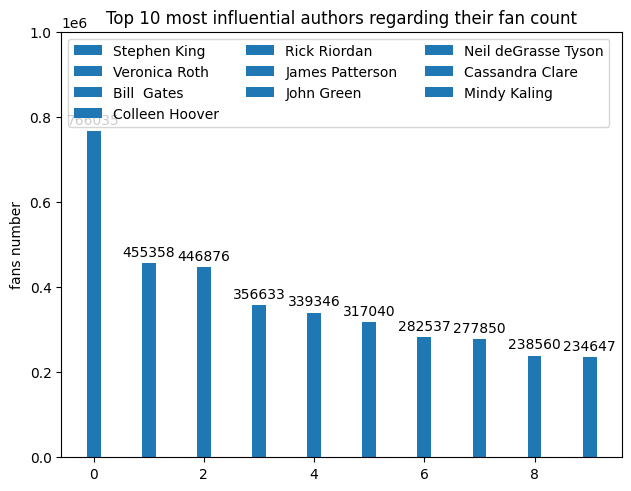

In [125]:
x = np.arange(10)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

offset = width * multiplier
rects = ax.bar(x + offset, lfc, width, label=ln)
ax.bar_label(rects, padding=3)

ax.set_ylabel('fans number')
ax.set_title('Top 10 most influential authors regarding their fan count')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1000000)

plt.show()

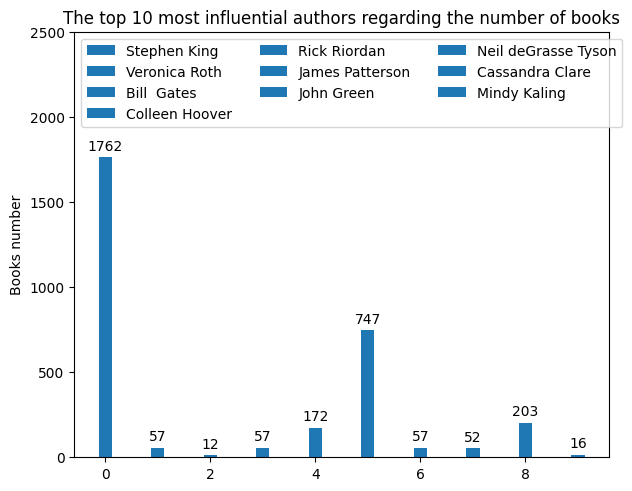

In [39]:
x = np.arange(10)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

#for attribute, measurement in penguin_means.items():
offset = width * multiplier
rects = ax.bar(x + offset, lnb, width, label=ln)
ax.bar_label(rects, padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Books number')
ax.set_title('The top 10 most influential authors regarding the number of books')
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 2500)

plt.show()

<H2>Have they published any series of books? If any, extract the longest series name among these authors.</H2>

To answer this question we need to select from the books dataframe only the rows(books) with one of the 10 most influential authors selected in the previous question and then check the lenght of all the series title in the dataset in order to find the longest one.

In [14]:
df_10 = df[df.author_id.isin(top_10.id)]
title = ""
max = 0
for row in df_10.iterrows():
    if row[1].iloc[14].isdigit() and int(row[1].iloc[14]) > max:
        title = row[1].iloc[13]
        max = int(row[1].iloc[14])
print('The longest series name among the top 10 authors is ' + title + ' with ' + str(max) + ' books')

The longest series name among the top 10 authors is Batman (1940-2011) with 400 books


<H2>How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.</H2>

First we grouped the database by the authors name and counted the unique occurences of the formats. Then we create a dictionary with the more used formats and plot it in a pie chart

In [126]:
df_f1_10 = df_10.groupby(by="author_name").format.nunique()
print(df_f1_10)
print()

df_f2_10 = dict(df_10.groupby(by="format")["format"].count())
df_f2_chart = {'others':df_f2_10.pop('')}
for keys in df_f2_10: 
    if df_f2_10[keys] < 20:
        pv = df_f2_chart['others']
        nv = df_f2_10[keys]
        df_f2_chart['others'] = pv + nv
    else:
        df_f2_chart[keys] = df_f2_10[keys]
print(df_f2_chart)

author_name
Bill  Gates             8
Cassandra Clare        17
Colleen Hoover         11
James Patterson        33
John Green             16
Mindy Kaling            8
Neil deGrasse Tyson    12
Rick Riordan           19
Stephen King           53
Veronica Roth          16
Name: format, dtype: int64

{'others': 3358, 'Audible Audio': 115, 'Audio': 194, 'Audio CD': 881, 'Audio Cassette': 91, 'Audiobook': 671, 'Hardcover': 2941, 'Kindle Edition': 304, 'Library Binding': 77, 'MP3 CD': 37, 'Mass Market Paperback': 609, 'Paperback': 5556, 'Unknown Binding': 53, 'ebook': 1584}


([<matplotlib.patches.Wedge at 0x13179df3710>,
 [Text(0.8819850505260731, 0.6573449403840576, 'others'),
  Text(0.29116386851210885, 1.0607655733822923, 'Audible Audio'),
  Text(0.22817611851425346, 1.076074188399559, 'Audio'),
  Text(0.004301082008350046, 1.0999915911922042, 'Audio CD'),
  Text(-0.1985384798945194, 1.081934596914792, 'Audio Cassette'),
  Text(-0.3531404796232396, 1.0417733926586281, 'Audiobook'),
  Text(-0.9348683076540494, 0.5796733971332942, 'Hardcover'),
  Text(-1.097755271589415, -0.07023790783935564, 'Kindle Edition'),
  Text(-1.0897582730801525, -0.14975615597818964, 'Library Binding'),
  Text(-1.0862446629529179, -0.17341433679572726, 'MP3 CD'),
  Text(-1.0566963185381095, -0.3056025038968206, 'Mass Market Paperback'),
  Text(-0.12446389947334914, -1.0929358342226172, 'Paperback'),
  Text(0.8988588676277505, -0.634076285699882, 'Unknown Binding'),
  Text(1.0501773565217696, -0.32730340641207534, 'ebook')])

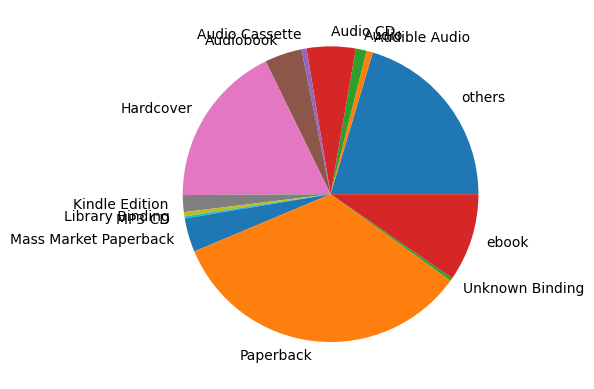

In [44]:
plt.pie(list(df_f2_chart.values()), labels = list(df_f2_chart.keys()))

<H2>Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias".</H2>
<H3>You can even ask ChatGPT or any other LLM chatbot tool: try to formulate a prompt that provides helpful information about it. Put that information in your notebook and provide comments on what you found.</H3>

I thought that the best way to analize anything related to structural bias was to grouped the books dataset by thegender and then calculate the different proportion of fans count and works count related to the numbers of writers and then also to analize the text reviews count and the average rating related to the numbers of fans.

In [127]:
au_ga = authors_json.groupby(by="gender")['id'].count()
au_g = authors_json.groupby(by="gender")["fans_count"].sum()
d_au = dict(au_g)
d = {'others':d_au.pop('')}
for el in d_au:
    if d_au[el] < 1000:
        pv = d['others']
        d['others'] = pv + d_au[el]
    else:
        d[el] = d_au[el]
print(d)
n_male = au_ga.male
n_female = au_ga.female
print('There are ' + str(n_male) + ' male writers and ' + str(n_female) + ' female writers')

{'others': 6146396, 'Agender': 1521, 'Couple (man and woman)': 1164, 'Enby': 1191, 'Nonbinary': 3264, 'The voice in your head': 2968, 'female': 19845412, 'genderqueer': 11403, 'male': 13237620, 'mustache machine': 1906, 'non-binary': 4311, 'transfeminine': 5575}
There are 138179 male writers and 109878 female writers


In [140]:
authors_json.fans_count = pd.to_numeric(authors_json.fans_count, errors='coerce')
authors_json.works_count = pd.to_numeric(authors_json.works_count, errors='coerce')
authors_json.average_rating = pd.to_numeric(authors_json.average_rating, errors='coerce')
authors_json.text_reviews_count = pd.to_numeric(authors_json.text_reviews_count, errors='coerce')
l = ['female', 'male']
au_clear = authors_json[authors_json.fans_count.notna()]
au_clear = authors_json[authors_json.works_count.notna()]
au_clear = authors_json[authors_json.average_rating.notna()]
au_clear = authors_json[authors_json.text_reviews_count.notna()]

nmf = au_clear[au_clear.gender == 'male'].fans_count.sum()
nwf = au_clear[au_clear.gender == 'female'].fans_count.sum()
nmw = au_clear[au_clear.gender == 'male'].works_count.sum()
nww = au_clear[au_clear.gender == 'female'].works_count.sum()
nma = au_clear[au_clear.gender == 'male'].average_rating.mean()
nwa = au_clear[au_clear.gender == 'female'].average_rating.mean()
nmr = au_clear[au_clear.gender == 'male'].text_reviews_count.sum()
nwr = au_clear[au_clear.gender == 'female'].text_reviews_count.sum()
lf = [nmf/(40*n_male), nwf/(40*n_female)]
lw = [nmw/(5*n_male), nww/(5*n_female)]
la = [nma, nwa]
lr = [nmr/d['male'], nwr/d['female']]
print('Male authors have ' + str(nmf) + ' fans and female authors have ' + str(nwf) + ' fans')

Male authors have 13237620 fans and female authors have 19845412 fans


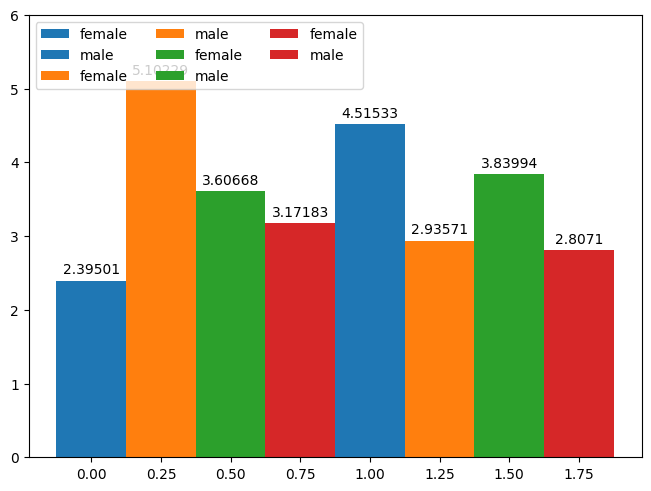

In [141]:
x = np.arange(2)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

offset = width * multiplier
rects = ax.bar(x + offset, lf, width, label=l)
ax.bar_label(rects, padding=3)
multiplier += 1
offset = width * multiplier
rects = ax.bar(x + offset, lw, width, label=l)
ax.bar_label(rects, padding=3)
multiplier += 1
offset = width * multiplier
rects = ax.bar(x + offset, la, width, label=l)
ax.bar_label(rects, padding=3)
multiplier += 1
offset = width * multiplier
rects = ax.bar(x + offset, lr, width, label=l)
ax.bar_label(rects, padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 6)

plt.show()

<H1>Command line question</H1>

My script implementation. First we create a new json file with a lighter dataset and the total_books_count so we can order the dataset(as usual ascending) by it and then reversing and taking the first 5 books series. Lastly we put the elements in lists in a new file and then printed it with tabular formatting

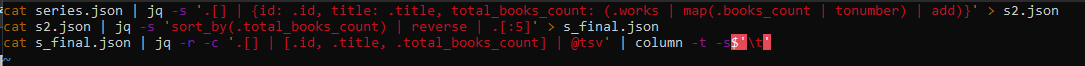

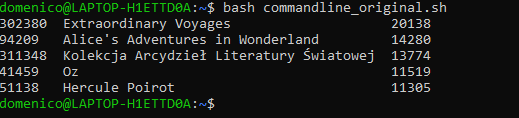

Next I asked ChatGPT to implement a more robust script implementation and we can see that ChatGPT's target was to insert some specific checks to avoid errors

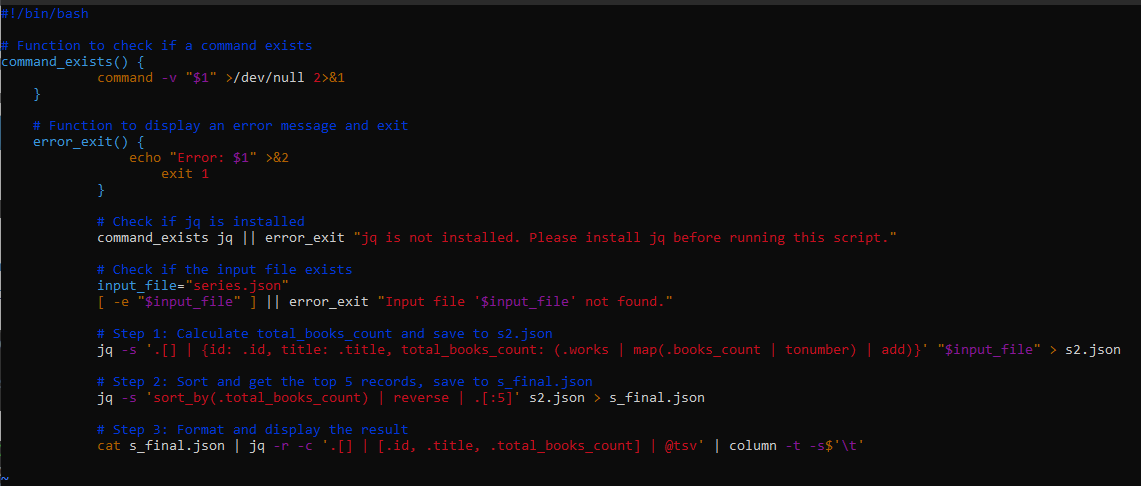

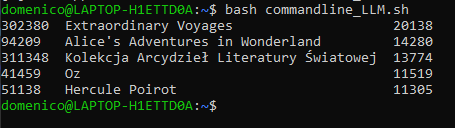

<H1>Algorithmic Question</H1>

In [5]:

from collections import deque
n_instructions = int(input())
deq = deque()
for i in range (n_instructions):
    ins, id = input().split()
    if ins == 'L':
        deq.appendleft(int(id))
    elif ins == 'R':
        deq.append(int(id))
    elif ins == '?':
        pos = deq.index(int(id))
        if pos < len(deq) - 1 - pos:
            print(pos)
        else:
            print(len(deq) - 1 - pos)


 17
 R 1
 L 2
 L 3
 L 4
 ? 3


1


 R 5
 R 6
 L 7
 L 8
 ? 4


2


 L 9
 R 10
 R 11
 L 12
 L 13
 ? 11


0


 ? 3


6


<H3>I asked ChatGPT to check my code's time complexity and this is the asnwer:</H3>

The most time-consuming operation is likely the deq.index(int(id)) line inside the loop.
The time complexity of the index operation in a deque is O(n), where n is the number of elements in the deque. This is because the operation needs to iterate through the deque to find the specified value.


Therefore, the overall time complexity of your code is O(n * m), where n is the number of instructions (n_instructions), and m is the average size of the deque at any given moment.

In the worst case, if the deque grows to be very large, the time complexity could be considered O(n^2), where n is the number of instructions. This is because for each instruction, you may need to search through the entire deque.

<b>I think ChatGPT analisys is correct but it's also important to notice that the average time complexity is lower than n^2 due the few number of reseach operation using the index function.</b>